In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns; sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [105]:
df = pd.read_csv('datasets/combined_player_stats_bio_bpm_clusters.csv', index_col=0)
df.shape
df.sample(5)

(6541, 116)

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,cluster_2_bpm,cluster_3_bpm,cluster_4_bpm,cluster_5_bpm,cluster_6_bpm,cluster_7_bpm,cluster_8_bpm,cluster_9_bpm,cluster_10_bpm,cluster_11_bpm
player,,,,,,,,,,,,,,,,,,,,,
Kevin Durant 2012,duranke01,SF,23,OKC,66,2546,26.2,0.610,0.265,0.386,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.0,0.000000,0.0
Zydrunas Ilgauskas 2008,ilgauzy01,C,32,CLE,73,2222,18.7,0.522,0.001,0.276,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.4,-0.0,-0.0,-0.000000,-0.0
Matt Bullard 2000,bullama01,PF,32,HOU,56,1024,11.9,0.541,0.521,0.088,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.3
José Calderón 2006,caldejo01,SG,24,TOR,64,1487,11.4,0.495,0.138,0.295,...,-0.0,-0.0,-0.0,-0.213993,-0.0,-0.0,-0.0,-0.0,-2.586007,-0.0
Kevin Garnett 2000,garneke01,PF,23,MIN,81,3243,23.6,0.545,0.053,0.265,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,6.3,0.000000,0.0


## Inspect Salary missing vals (conv to float or NAN)


In [94]:
df.loc[:, 'salary'] = df['salary'].apply(lambda x: np.nan if x=='missing' else float(x))

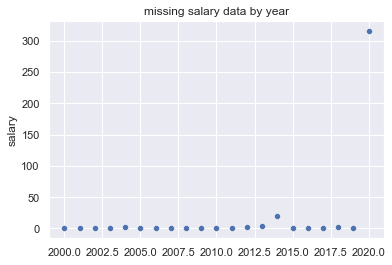

In [73]:
y = df.set_index('year')['salary'].isna().sum(level=0)
s = sns.scatterplot(x=[year for year in range(2000,2021)], y=y)
s.set_title('missing salary data by year');

In [ ]:
cl_salary_means = df.group

## Average player in each cluster

In [104]:
len(df.columns)
df.dtypes.value_counts()
cl_groups = df.groupby('label')
len(cl_groups.mean().columns)
set(df.columns)-set(cl_groups.mean().columns)

116

float64    102
int64       10
object       4
dtype: int64

111

{'label', 'nationality', 'player_id', 'pos', 'team_id'}

In [96]:
## convert position to int
df['pos'].value_counts()
# pos_dict = {'PG':1, 'SG': 2, 'SF':3,'PF':4,'C':5}

# df.loc[:, 'pos'] = df['pos'].map(pos_dict)


SG       1371
PF       1300
PG       1299
C        1243
SF       1209
SF-SG      19
PG-SG      18
PF-SF      14
C-PF       14
SG-PG      14
SG-SF      12
PF-C       12
SF-PF      11
SG-PF       4
PG-SF       1
Name: pos, dtype: int64

## Create Master player dataset by adding the principal components

In [106]:
df_pca = pd.read_csv('datasets/pca/pca99_slim_2000_to_2020.csv', index_col=0)
df_pca.shape
df_pca.sample(5)

(6541, 29)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28
player,,,,,,,,,,,,,,,,,,,,,
Scott Burrell 2000,-2.710960,-1.963352,2.561816,-0.672241,-2.159495,2.128556,-0.785074,0.026241,-1.302413,1.236265,...,0.262071,0.267257,-0.486296,-0.044568,-0.128450,-0.242340,0.251290,-0.586219,0.161812,0.043672
Derrick Favors 2012,6.810037,-0.584719,-1.086449,-0.431968,1.221849,0.487625,-0.627120,-0.769253,-0.650133,0.162426,...,-0.558173,0.407654,0.731387,0.282333,-0.148789,-0.241481,0.029643,-0.385894,-0.075157,-0.123279
Brandan Wright 2013,5.674451,1.016630,1.206983,-0.902171,0.387419,-0.918518,-3.150486,1.714990,1.464435,2.082894,...,-0.594294,0.352182,0.159940,-0.820776,0.652656,-0.911335,0.012426,-0.381978,0.003521,0.252183
Udonis Haslem 2009,3.042883,-1.829665,-0.547348,-1.524038,-2.069733,-3.766863,-0.566761,1.533648,-1.445316,-0.101164,...,-0.471942,-0.695560,0.183134,-0.853658,-0.009512,0.109924,-0.119176,-0.317614,0.160596,-0.151759
Jonas Jerebko 2013,0.707543,-0.010899,0.481149,-1.086348,1.595046,2.408682,-0.205055,1.064757,0.679422,1.443879,...,-0.368474,0.311670,-0.266542,0.415852,0.403832,0.101473,0.295517,0.033822,0.225874,-0.103285


In [112]:
df_players = pd.read_csv('datasets/combined_player_stats_bio_bpm_clusters.csv', index_col=0)
df = df_players.merge(df_pca, left_index=True, right_index=True)
df.shape

df.to_csv('datasets/master_players_stats_bio_clusters_pca.csv')

(6541, 145)

In [114]:
df['pc_0'].sort_values()

player
Damon Jones 2008         -7.625142
Dee Brown 2000           -6.982841
Jason Terry 2018         -6.903950
Damon Jones 2006         -6.886633
Steve Kerr 2001          -6.816578
                           ...    
Shaquille O'Neal 2001    10.638361
DeAndre Jordan 2016      10.681439
Shaquille O'Neal 2006    10.700161
Shaquille O'Neal 2002    10.727679
Shaquille O'Neal 2005    10.951969
Name: pc_0, Length: 6541, dtype: float64

## Quick PCA plot

In [529]:
def get_player_pca_coords(df, player_name, year, dim=2):
    idx = f'{player_name} {year}'
    player = df.loc[idx, :]
    x = player['pc_0']
    y = player['pc_1']
    z = player['pc_2']
    if dim == 2:
        return (x,y)
    elif dim == 3:
        return (x,y,z)
    
def annotate_pca_plot(df, player_season_side_tups, dim):
    for player_name, season, side in player_season_side_tups:
        coords = get_player_pca_coords(df, player_name, season, dim)
        
#         text = player_name.split(' ')[-1] + ' ' + str(season)[-2:] + "'"
        text = player_name + ' ' + str(season)[-2:] + "'"
        xytext = (-15, 0) if side == 'right' else (15, 0)
        plt.annotate(text, xy=coords,  xycoords='data',
             xytext=xytext, textcoords='offset points',
             size=6, ha=side, va="center",
             bbox=dict(boxstyle="round", alpha=0.2),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.2));
    

In [358]:
coords = get_player_pca_coords(df, 'Stephen Curry', 2016, dim=2)
coords

(-2.389837201337852, 10.641287012926094)

Text(0.5, 1.0, 'PCA NBA Players clusters')

Text(0.5, 9.444444444444438, 'Principal Component 0 (28.3% explained var)')

Text(16.75768055555556, 0.5, 'Principal Component 1 (49.7% cum. explained var)')

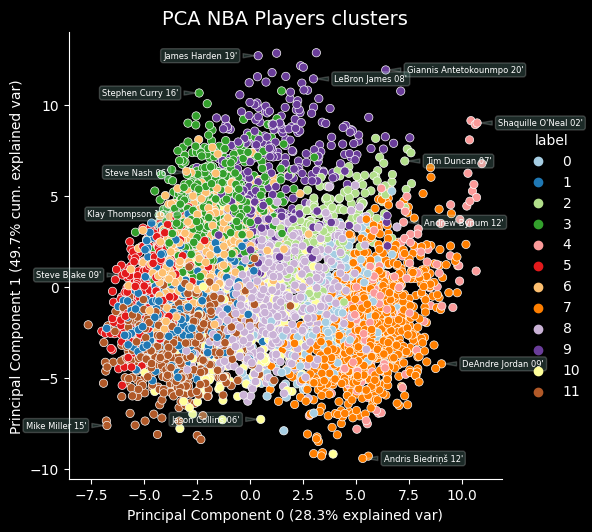

In [533]:

plt.style.use("dark_background")
# plt.style.use("default")
sns.relplot(x='pc_0', y='pc_1', data=df, hue='label',  palette='Paired')#, size='vorp')
# Paired, deep

player_season_side_tups = [('Stephen Curry', 2016, 'right'),
                      ('James Harden', 2019, 'right'),
#                       ('Russell Westbrook', 2017),
                      ("Shaquille O'Neal", 2002, 'left'),
                      
#                       ('Jason Terry', 2018, 'right'),
                      ('DeAndre Jordan', 2009, 'left'),
                    ('Andris Biedriņš', 2012, 'left'),
                    
                      ('Jason Collins', 2006, 'right'),
                    ('Mike Miller', 2015, 'right'),
                    
                      ('Steve Blake', 2009, 'right'),
                    ('Klay Thompson', 2016, 'right'),
                    ('Giannis Antetokounmpo', 2020, 'left'),
                    ('Tim Duncan', 2007, 'left'),
                    
#                    ('LeBron James', 2019, 'left'),
                   ('LeBron James', 2008, 'left'),
#                     ('Chris Bosh', 2008, 'left')
#                     ('Chris Andersen', 2011, 'left'),
                           ('Steve Nash', 2006, 'right'),
                    ('Andrew Bynum', 2012, 'left')
                     ]

annotate_pca_plot(df, player_season_side_tups, dim=2)

plt.title('PCA NBA Players clusters', fontsize=14)
plt.xlabel('Principal Component 0 (28.3% explained var)')
plt.ylabel('Principal Component 1 (49.7% cum. explained var)');
# plt.tight_layout()
plt.savefig('pca_players_annotated_dark.png', bbox_inches='tight')

In [484]:
df.loc[:, ['pc_0', 'pc_1']].sum(axis=1).sort_values()

player
Mike Miller 2015             -14.374742
DeShawn Stevenson 2012       -14.153405
Terrance Ferguson 2020       -13.027554
Rashad Vaughn 2016           -12.616781
DeAndre Liggins 2018         -12.480654
                                ...    
Giannis Antetokounmpo 2020    18.322575
Shaquille O'Neal 2003         18.433231
Shaquille O'Neal 2001         19.543871
Shaquille O'Neal 2000         19.557288
Shaquille O'Neal 2002         19.722213
Length: 6541, dtype: float64

In [507]:
# df.loc[:, ['pc_0', 'pc_1', 'label']].sort_values(by='pc_1', ascending=True)[0:30]
df[df['label']==4][['pc_0', 'pc_1']].sort_values(by='pc_0', ascending=False)[0:50]

,pc_0,pc_1
player,,
Shaquille O'Neal 2005,10.951969,6.759645
Shaquille O'Neal 2002,10.727679,8.994535
Shaquille O'Neal 2006,10.700161,4.898653
DeAndre Jordan 2016,10.681439,0.853877
Shaquille O'Neal 2001,10.638361,8.905510
Dwight Howard 2009,10.574128,5.618820
Shaquille O'Neal 2004,10.506957,5.249313
Shaquille O'Neal 2000,10.435359,9.121929
Dwight Howard 2010,10.386154,4.692807


In [ ]:

plt.style.use("dark_background")
# plt.style.use("default")




sns.relplot(x='pc_0', y='pc_1', data=df, hue='label',  palette='Paired')#, size='vorp')
# Paired, deep

plt.annotate('Steph Curry', xy=coords,  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=8, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));





plt.title('PCA NBA Players by cluster and vorp', fontsize=14)
plt.xlabel('Principal Component 0 (28.3% explained var)')
plt.ylabel('Principal Component 1 (49.7% cum. explained var)');

### Experiment with 3d plot

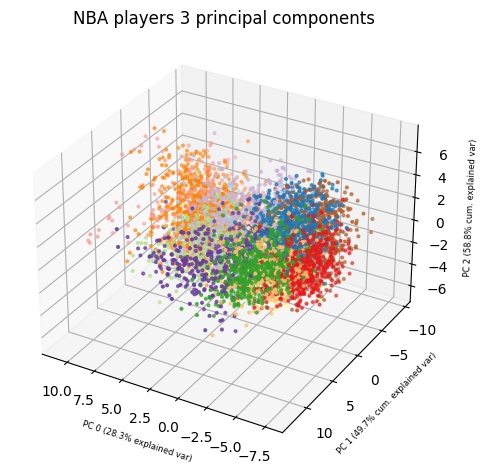

In [308]:
plt.style.use("default")
# plt.style.use("dark_background")
# plt.style.use("white")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['pc_0'], df['pc_1'], df['pc_2'], c=df['label'], s=4, cmap='Paired');
ax.set_title('NBA players 3 principal components')
ax.set_xlabel('PC 0 (28.3% explained var)', fontsize=6)
ax.set_ylabel('PC 1 (49.7% cum. explained var)', fontsize=6)
ax.set_zlabel('PC 2 (58.8% cum. explained var)', fontsize=6)

# plt.legend();
plt.tight_layout()
ax.view_init(30, 120);
# plt.show();

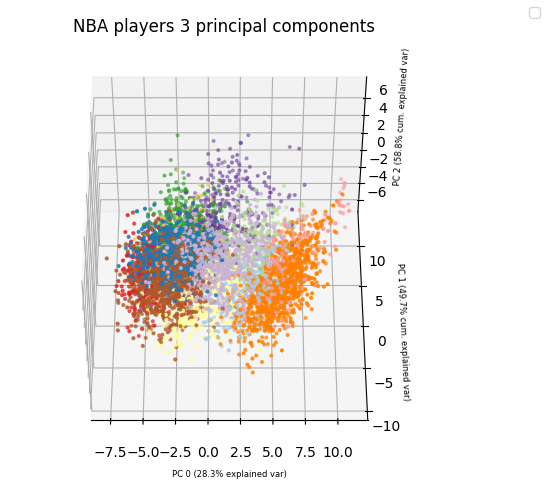

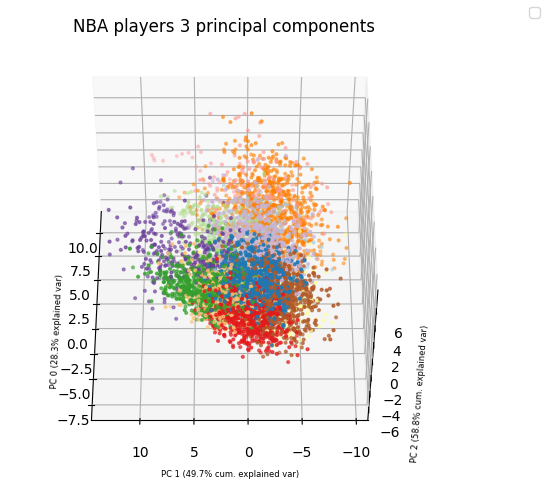

In [329]:
### Similar to looking at 2d picture with a little bit of depth
ax.view_init(50, 270);
fig

ax.view_init(50, 180);
fig